In [1]:
import yfinance as yf
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')


from data_downloader import DataDownloader
from data_downloader import BetaCalculator
from data_downloader import ClimateDataCleaner
from var_model import VAR
from dice_model import DiceModel

In [2]:
downloader = DataDownloader()

assets = ['AAPL', 'IBM', 'TSLA', 'GOOG', 'NVDA', 'NEE', 'FSLR', 'VWDRY', 'BEP'] 
benchmark = '^GSPC'  
start_date = '2014-12-01'
end_date = '2024-05-31'
rf = .065

asset_prices, benchmark_prices = downloader.download_data(start_date=start_date, end_date=end_date,
                                                                      assets=assets, benchmark=benchmark)

[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
asset_prices.head()

,Date,AAPL,BEP,FSLR,GOOG,IBM,NEE,NVDA,TSLA,VWDRY
0,2015-01-01,0.061424,0.039767,-0.051121,0.015426,-0.044440,0.027754,-0.042394,-0.084574,0.078838
1,2015-02-01,0.100777,-0.030332,0.411862,0.044676,0.063701,-0.045986,0.153382,-0.001277,0.076154
2,2015-03-01,-0.031372,0.026324,0.000669,-0.018625,-0.008892,0.005703,-0.051224,-0.071653,-0.007800
3,2015-04-01,0.005786,0.032932,-0.002007,-0.016760,0.067227,-0.029985,0.060678,0.197489,0.094161
4,2015-05-01,0.045339,-0.058227,-0.166918,-0.009733,-0.002079,0.021757,0.001461,0.109489,0.134089


In [4]:
asset_prices

,Date,AAPL,BEP,FSLR,GOOG,IBM,NEE,NVDA,TSLA,VWDRY
0,2015-01-01,0.061424,0.039767,-0.051121,0.015426,-0.044440,0.027754,-0.042394,-0.084574,0.078838
1,2015-02-01,0.100777,-0.030332,0.411862,0.044676,0.063701,-0.045986,0.153382,-0.001277,0.076154
2,2015-03-01,-0.031372,0.026324,0.000669,-0.018625,-0.008892,0.005703,-0.051224,-0.071653,-0.007800
3,2015-04-01,0.005786,0.032932,-0.002007,-0.016760,0.067227,-0.029985,0.060678,0.197489,0.094161
4,2015-05-01,0.045339,-0.058227,-0.166918,-0.009733,-0.002079,0.021757,0.001461,0.109489,0.134089
...,...,...,...,...,...,...,...,...,...,...
108,2024-01-01,-0.042227,-0.010274,-0.150801,0.006173,0.122959,-0.034738,0.242417,-0.246257,-0.112488
109,2024-02-01,-0.018543,-0.124793,0.051880,-0.014245,0.016644,-0.050057,0.285809,0.077901,-0.007519
110,2024-03-01,-0.051286,0.036591,0.096887,0.089283,0.032049,0.158000,0.142181,-0.129235,-0.001082
111,2024-04-01,-0.006706,-0.095566,0.044431,0.081308,-0.129661,0.047880,-0.043760,0.042608,-0.039003


In [9]:
cleaner = ClimateDataCleaner('Data/Temperature.csv', 'Data/Drought_Severity.csv', 'Data/CO2_Emissions.xlsx')

# Clean and prepare the data
climate_data = cleaner.clean_and_prepare_data()

climate_data

,Date,Temperature,DSCI,Coal,Natural Gas,Petroleum,Total CO2 Emissions
0,2015-12-01,0.901426,-0.255769,-0.254337,-0.030455,0.003185,-0.081126
1,2016-01-01,-0.269958,-0.387409,-0.134518,-0.007158,-0.016638,-0.046625
2,2016-02-01,-2.099915,-0.465169,-0.234956,-0.093864,0.044621,-0.081507
3,2016-03-01,0.281115,-0.479522,-0.296251,-0.091389,0.010536,-0.100557
4,2016-04-01,0.035118,-0.471058,-0.183482,0.038403,0.003163,-0.033790
...,...,...,...,...,...,...,...
97,2024-01-01,4.009622,-0.307153,0.167510,0.120100,0.010273,0.081480
98,2024-02-01,-5.464459,-0.414487,-0.041299,0.006871,0.007048,0.000088
99,2024-03-01,0.806495,-0.321918,-0.210958,-0.074042,-0.042391,-0.078618
100,2024-04-01,0.234115,-0.335092,-0.072617,-0.010663,0.001523,-0.012618


In [12]:
beta_calculator = BetaCalculator(asset_prices, benchmark_prices, climate_data)
beta_calculator.calculate_betas()

,AAPL,BEP,FSLR,GOOG,IBM,NEE,NVDA,TSLA,VWDRY
^GSPC,1.246547,0.930171,1.325708,1.034244,0.926776,0.430098,1.865666,1.957265,1.121458
Temperature,-0.000070,-0.000139,-0.000047,0.000052,-0.000095,-0.000131,-0.000047,-0.000017,0.000025
DSCI,0.013210,0.002284,0.000253,0.008253,0.000674,0.002488,-0.000590,0.033726,0.015758
Coal,-0.057137,-0.090357,-0.051674,0.027343,-0.001762,-0.034124,-0.033545,-0.236261,-0.070191
Natural Gas,-0.128715,-0.222898,-0.304895,-0.163180,-0.059568,-0.085598,-0.212472,-0.555508,-0.265030
Petroleum,-0.124482,-0.158633,-0.261134,-0.042732,-0.004160,-0.019673,0.056880,-0.488232,-0.270999
Total CO2 Emissions,-0.186202,-0.281836,-0.308654,-0.049955,-0.029207,-0.075385,-0.028847,-0.769730,-0.357983


<Axes: title={'center': 'Asset Returns'}, xlabel='Date'>

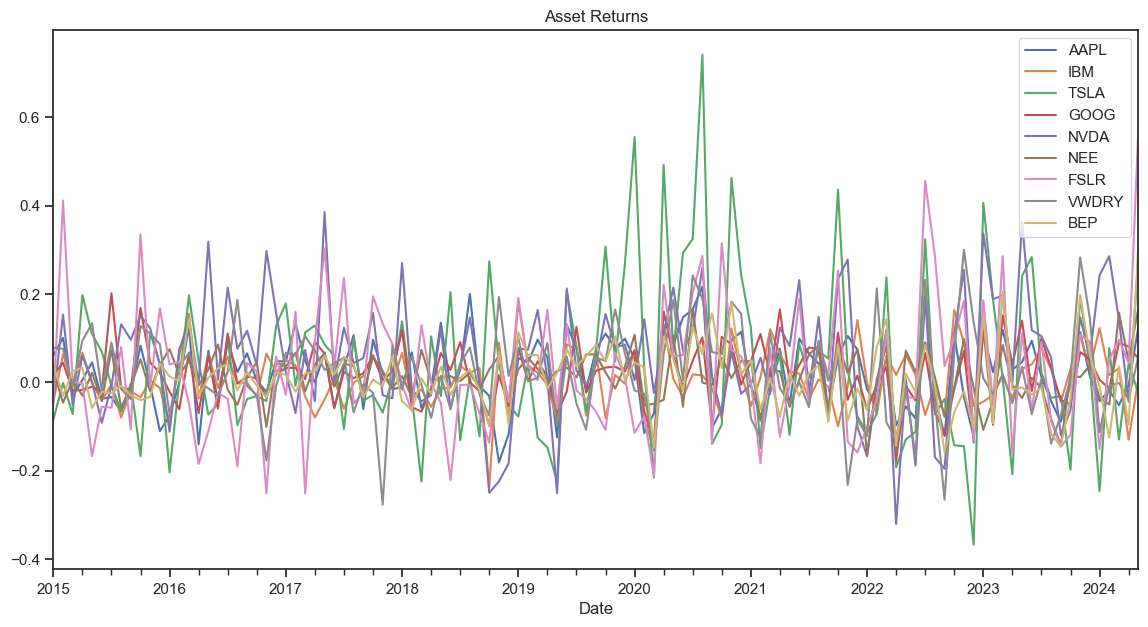

In [6]:
asset_prices.plot(x='Date', y=assets, figsize=(14, 7), title='Asset Returns')